In [2]:
import sklearn

import numpy as np
import os   

np.random.seed(42)

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [63]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

X, y = mnist["data"], mnist["target"]

y = y.astype(np.uint8)

# X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [65]:
# we will now train a Support Vector Machine (SVM) classifier with default hyperparameters
from sklearn.svm import SVC

svm_clf_stock = SVC()
svm_clf_stock.fit(X_train, y_train)

# lets see how it performs on the test set

from sklearn.metrics import accuracy_score

y_pred = svm_clf_stock.predict(X_test)
accuracy_score(y_test, y_pred)

0.9878

In [23]:
# lets see which hyperparameters it used
svm_clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [64]:
# we will not use the entire training set, but only a subset to search for the best hyperparameters
# so we will now create a smaller training set but stratified so that each class is represented equally


from sklearn.model_selection import StratifiedShuffleSplit

# Create stratified splits
split = StratifiedShuffleSplit(n_splits=1, test_size=10000, random_state=42)
for train_index, test_index in split.split(X, y):
    X_train_full = X[train_index]
    y_train_full = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]

# Further split the training set into a smaller subset for hyperparameter tuning
split = StratifiedShuffleSplit(n_splits=1, test_size=10000, random_state=42)
for train_index, subset_index in split.split(X_train_full, y_train_full):
    X_train_subset = X_train_full[subset_index]
    y_train_subset = y_train_full[subset_index]

In [31]:
# show size og the subsets
X_train_subset.shape

(10000, 784)

In [8]:
# lets tune the hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'kernel': ['linear'], 'C': [10., 1000., 3000., 30000.0]},
    {'kernel': ['rbf'], 'gamma': [ 0.1, 0.3, 1.0, 3.0], 'C': [10., 100., 1000., 10000]},
]

grid_search = GridSearchCV(svm_clf, param_grid, cv=3, verbose=3)
grid_search.fit(
    X_train_subset, y_train_subset)
    

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END .............C=10.0, kernel=linear;, score=0.916 total time=   8.5s
[CV 2/3] END .............C=10.0, kernel=linear;, score=0.908 total time=   8.7s
[CV 3/3] END .............C=10.0, kernel=linear;, score=0.900 total time=   9.9s
[CV 1/3] END ...........C=1000.0, kernel=linear;, score=0.916 total time=   8.8s
[CV 2/3] END ...........C=1000.0, kernel=linear;, score=0.908 total time=   8.4s
[CV 3/3] END ...........C=1000.0, kernel=linear;, score=0.900 total time=   8.2s
[CV 1/3] END ...........C=3000.0, kernel=linear;, score=0.916 total time=   8.4s
[CV 2/3] END ...........C=3000.0, kernel=linear;, score=0.908 total time=   8.4s
[CV 3/3] END ...........C=3000.0, kernel=linear;, score=0.900 total time=   8.1s
[CV 1/3] END ..........C=30000.0, kernel=linear;, score=0.916 total time=   8.2s
[CV 2/3] END ..........C=30000.0, kernel=linear;, score=0.908 total time=   8.4s
[CV 3/3] END ..........C=30000.0, kernel=linear;

GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [10.0, 1000.0, 3000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [10.0, 100.0, 1000.0, 10000],
                          'gamma': [0.1, 0.3, 1.0, 3.0], 'kernel': ['rbf']}],
             verbose=3)

In [15]:
# lets see the best hyperparameters
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 10.0, 'kernel': 'linear'}
0.9077333333333333


In [11]:
# lets try random search
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import expon, reciprocal

param_distribs = {
    'kernel': ['linear', 'rbf'],
    'C': reciprocal(20, 200000),
    'gamma': expon(scale=1.0),
}

svm_clf = SVC()
rnd_search = RandomizedSearchCV(svm_clf, param_distribs, n_iter=50, cv=3, verbose=3)
rnd_search.fit(X_train_subset, y_train_subset)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV 1/3] END C=280.0238382822748, gamma=0.8936325301461753, kernel=rbf;, score=0.113 total time= 1.3min
[CV 2/3] END C=280.0238382822748, gamma=0.8936325301461753, kernel=rbf;, score=0.113 total time= 1.3min
[CV 3/3] END C=280.0238382822748, gamma=0.8936325301461753, kernel=rbf;, score=0.113 total time= 1.3min
[CV 1/3] END C=200.46355957145818, gamma=0.03960891229942073, kernel=linear;, score=0.916 total time=   8.3s
[CV 2/3] END C=200.46355957145818, gamma=0.03960891229942073, kernel=linear;, score=0.908 total time=   8.0s
[CV 3/3] END C=200.46355957145818, gamma=0.03960891229942073, kernel=linear;, score=0.900 total time=   8.1s
[CV 1/3] END C=551.8138050879572, gamma=0.135889041297428, kernel=linear;, score=0.916 total time=   8.3s
[CV 2/3] END C=551.8138050879572, gamma=0.135889041297428, kernel=linear;, score=0.908 total time=   7.8s
[CV 3/3] END C=551.8138050879572, gamma=0.135889041297428, kernel=linear;, score=0.900 

RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x31f30a0c0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x31f3089b0>,
                                        'kernel': ['linear', 'rbf']},
                   verbose=3)

In [14]:
# lets see the best hyperparameters and score
print(rnd_search.best_params_)
print(rnd_search.best_score_)

{'C': 200.46355957145818, 'gamma': 0.03960891229942073, 'kernel': 'linear'}
0.9077333333333333


In [16]:
# now we will run the best model on the entire training set
from sklearn.metrics import accuracy_score

y_pred = grid_search.best_estimator_.predict(X_test)
accuracy_score(y_test, y_pred)

0.9157

In [18]:
# lets try a grid search again this time optimizing 
# degree, C and coef0 for the polynomial kernel
# and C and gamma for the RBF kernel

param_grid = [
    {'kernel': ['poly'], 'degree': [3, 4, 5], 'C': [10., 100., 1000., 10000.0]},
    {'kernel': ['rbf'], 'gamma': [ 0.1, 0.3, 1.0, 3.0], 'C': [10., 100., 1000., 10000]},
]

grid_search = GridSearchCV(svm_clf, param_grid, cv=3, verbose=3)
grid_search.fit(
    X_train_subset, y_train_subset)


Fitting 3 folds for each of 28 candidates, totalling 84 fits
[CV 1/3] END .....C=10.0, degree=3, kernel=poly;, score=0.965 total time=   9.1s
[CV 2/3] END .....C=10.0, degree=3, kernel=poly;, score=0.951 total time=   9.1s
[CV 3/3] END .....C=10.0, degree=3, kernel=poly;, score=0.957 total time=   8.9s
[CV 1/3] END .....C=10.0, degree=4, kernel=poly;, score=0.952 total time=   9.7s
[CV 2/3] END .....C=10.0, degree=4, kernel=poly;, score=0.942 total time=  10.0s
[CV 3/3] END .....C=10.0, degree=4, kernel=poly;, score=0.945 total time=   9.9s
[CV 1/3] END .....C=10.0, degree=5, kernel=poly;, score=0.930 total time=  11.7s
[CV 2/3] END .....C=10.0, degree=5, kernel=poly;, score=0.919 total time=  11.6s
[CV 3/3] END .....C=10.0, degree=5, kernel=poly;, score=0.923 total time=  11.4s
[CV 1/3] END ....C=100.0, degree=3, kernel=poly;, score=0.964 total time=   9.1s
[CV 2/3] END ....C=100.0, degree=3, kernel=poly;, score=0.950 total time=   9.0s
[CV 3/3] END ....C=100.0, degree=3, kernel=poly;

GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [10.0, 100.0, 1000.0, 10000.0],
                          'degree': [3, 4, 5], 'kernel': ['poly']},
                         {'C': [10.0, 100.0, 1000.0, 10000],
                          'gamma': [0.1, 0.3, 1.0, 3.0], 'kernel': ['rbf']}],
             verbose=3)

In [21]:
# lets see the best hyperparameters and score
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 10.0, 'degree': 3, 'kernel': 'poly'}
0.9574666666666666


In [19]:
# now random search
param_distribs = {
    'kernel': ['poly', 'rbf'],
    'C': reciprocal(20, 200000),
    'gamma': expon(scale=1.0),
    'degree': [3, 4, 5],
    'coef0': [0, 1, 2],
}

svm_clf = SVC()
rnd_search = RandomizedSearchCV(svm_clf, param_distribs, n_iter=50, cv=3, verbose=3)
rnd_search.fit(X_train_subset, y_train_subset)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV 1/3] END C=199480.61055720522, coef0=1, degree=5, gamma=0.810651592641394, kernel=poly;, score=0.934 total time=  10.0s
[CV 2/3] END C=199480.61055720522, coef0=1, degree=5, gamma=0.810651592641394, kernel=poly;, score=0.922 total time=   9.8s
[CV 3/3] END C=199480.61055720522, coef0=1, degree=5, gamma=0.810651592641394, kernel=poly;, score=0.926 total time=   9.8s
[CV 1/3] END C=16051.416797380823, coef0=1, degree=4, gamma=0.47457494062801897, kernel=poly;, score=0.950 total time=   9.0s
[CV 2/3] END C=16051.416797380823, coef0=1, degree=4, gamma=0.47457494062801897, kernel=poly;, score=0.939 total time=   9.1s
[CV 3/3] END C=16051.416797380823, coef0=1, degree=4, gamma=0.47457494062801897, kernel=poly;, score=0.944 total time=   9.2s
[CV 1/3] END C=1268.2548649032617, coef0=1, degree=3, gamma=3.080223786441709, kernel=poly;, score=0.964 total time=   8.7s
[CV 2/3] END C=1268.2548649032617, coef0=1, degree=3, gamma=3.08

RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x31f30bc50>,
                                        'coef0': [0, 1, 2], 'degree': [3, 4, 5],
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x31f30ac60>,
                                        'kernel': ['poly', 'rbf']},
                   verbose=3)

In [20]:
# lets see the params and score
print(rnd_search.best_params_)
print(rnd_search.best_score_)

{'C': 1268.2548649032617, 'coef0': 1, 'degree': 3, 'gamma': 3.080223786441709, 'kernel': 'poly'}
0.9564


In [22]:
# the grid search seems to have found the best hyperparameters
# lets run it on the whole training set

y_pred = grid_search.best_estimator_.predict(X_test)
accuracy_score(y_test, y_pred)

0.9641

In [37]:
# so poly seems to perform the best in our searches
# lets try to tune the hyperparameters even more

param_grid = [
    {'kernel': ['poly'], 'degree': [ 5], 'C': [1, 2,3,10.,], 'coef0': [0, 1, 2]},
]

grid_search2 = GridSearchCV(svm_clf, param_grid, cv=3, verbose=3)
grid_search2.fit(X_train_subset, y_train_subset)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END C=1, coef0=0, degree=5, kernel=poly;, score=0.872 total time=   8.5s
[CV 2/3] END C=1, coef0=0, degree=5, kernel=poly;, score=0.888 total time=   8.9s
[CV 3/3] END C=1, coef0=0, degree=5, kernel=poly;, score=0.875 total time=   8.8s
[CV 1/3] END C=1, coef0=1, degree=5, kernel=poly;, score=0.954 total time=   5.7s
[CV 2/3] END C=1, coef0=1, degree=5, kernel=poly;, score=0.959 total time=   4.9s
[CV 3/3] END C=1, coef0=1, degree=5, kernel=poly;, score=0.953 total time=   4.6s
[CV 1/3] END C=1, coef0=2, degree=5, kernel=poly;, score=0.954 total time=   4.6s
[CV 2/3] END C=1, coef0=2, degree=5, kernel=poly;, score=0.960 total time=   4.7s
[CV 3/3] END C=1, coef0=2, degree=5, kernel=poly;, score=0.953 total time=   4.6s
[CV 1/3] END C=2, coef0=0, degree=5, kernel=poly;, score=0.889 total time=   7.3s
[CV 2/3] END C=2, coef0=0, degree=5, kernel=poly;, score=0.906 total time=   7.4s
[CV 3/3] END C=2, coef0=0, degree=5, 

GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [1, 2, 3, 10.0], 'coef0': [0, 1, 2],
                          'degree': [5], 'kernel': ['poly']}],
             verbose=3)

In [39]:
# lets see the best hyperparameters and score
print(grid_search2.best_params_)
print(grid_search2.best_score_)

{'C': 1, 'coef0': 2, 'degree': 5, 'kernel': 'poly'}
0.9556001490970933


In [41]:
# not looking so good, lets try rbf again with values for c and gamma

param_grid = [
    {'kernel': ['rbf'], 'gamma': [0.1, 1.0, 3.0, "scale"], 'C': [100, 1000]},
]

grid_search = GridSearchCV(svm_clf, param_grid, cv=3, verbose=3)
grid_search.fit(
    X_train_subset, y_train_subset)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END ......C=100, gamma=0.1, kernel=rbf;, score=0.112 total time=  34.9s
[CV 2/3] END ......C=100, gamma=0.1, kernel=rbf;, score=0.113 total time=  43.3s
[CV 3/3] END ......C=100, gamma=0.1, kernel=rbf;, score=0.113 total time=  40.1s
[CV 1/3] END ......C=100, gamma=1.0, kernel=rbf;, score=0.112 total time=  39.2s
[CV 2/3] END ......C=100, gamma=1.0, kernel=rbf;, score=0.113 total time=  39.4s
[CV 3/3] END ......C=100, gamma=1.0, kernel=rbf;, score=0.113 total time=  40.2s
[CV 1/3] END ......C=100, gamma=3.0, kernel=rbf;, score=0.112 total time=  34.9s
[CV 2/3] END ......C=100, gamma=3.0, kernel=rbf;, score=0.113 total time=  34.9s
[CV 3/3] END ......C=100, gamma=3.0, kernel=rbf;, score=0.113 total time=  36.2s
[CV 1/3] END ....C=100, gamma=scale, kernel=rbf;, score=0.964 total time=   8.2s
[CV 2/3] END ....C=100, gamma=scale, kernel=rbf;, score=0.965 total time=   8.8s
[CV 3/3] END ....C=100, gamma=scale, kernel=rbf;,

GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [100, 1000], 'gamma': [0.1, 1.0, 3.0, 'scale'],
                          'kernel': ['rbf']}],
             verbose=3)

In [42]:
# lets see the best hyperparameters and score
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
0.9642999992860714


In [45]:
# still not looking so good, lets try rbf again with values for c and gamma set to scale

param_grid = [
    {'kernel': ['rbf'], 'gamma': ["scale"], 'C': [1, 5, 10, 50, 100, 1000, 1000, 10000]},
]

grid_search = GridSearchCV(svm_clf, param_grid, cv=3, verbose=3)
grid_search.fit(
    X_train_subset, y_train_subset)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END ......C=1, gamma=scale, kernel=rbf;, score=0.957 total time=   9.2s
[CV 2/3] END ......C=1, gamma=scale, kernel=rbf;, score=0.958 total time=   8.9s
[CV 3/3] END ......C=1, gamma=scale, kernel=rbf;, score=0.962 total time=   8.4s
[CV 1/3] END ......C=5, gamma=scale, kernel=rbf;, score=0.964 total time=   8.2s
[CV 2/3] END ......C=5, gamma=scale, kernel=rbf;, score=0.965 total time=   8.6s
[CV 3/3] END ......C=5, gamma=scale, kernel=rbf;, score=0.963 total time=   8.2s
[CV 1/3] END .....C=10, gamma=scale, kernel=rbf;, score=0.964 total time=   8.3s
[CV 2/3] END .....C=10, gamma=scale, kernel=rbf;, score=0.965 total time=   8.3s
[CV 3/3] END .....C=10, gamma=scale, kernel=rbf;, score=0.963 total time=   8.1s
[CV 1/3] END .....C=50, gamma=scale, kernel=rbf;, score=0.964 total time=   8.2s
[CV 2/3] END .....C=50, gamma=scale, kernel=rbf;, score=0.965 total time=   8.2s
[CV 3/3] END .....C=50, gamma=scale, kernel=rbf;,

GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [1, 5, 10, 50, 100, 1000, 1000, 10000],
                          'gamma': ['scale'], 'kernel': ['rbf']}],
             verbose=3)

In [46]:
# lets see the best hyperparameters and score
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.9642999992860714


In [47]:
# lets tain on the whole training set
y_pred = grid_search.best_estimator_.predict(X_test)
accuracy_score(y_test, y_pred)

0.9676

In [49]:
# the accuracy is still not that good lets use gamma scale and different values for C

param_grid = [
    {'kernel': ['rbf'], 'gamma': ["scale"], 'C': [0.2, 0.5 ,1, 5, 10, 50, 100, 1000, 1000, 10000]},
]

grid_search_scale = GridSearchCV(svm_clf, param_grid, cv=3, verbose=3)
grid_search_scale.fit(
    X_train_subset, y_train_subset)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END ....C=0.2, gamma=scale, kernel=rbf;, score=0.935 total time=  12.6s
[CV 2/3] END ....C=0.2, gamma=scale, kernel=rbf;, score=0.939 total time=  12.1s
[CV 3/3] END ....C=0.2, gamma=scale, kernel=rbf;, score=0.938 total time=  12.6s
[CV 1/3] END ....C=0.5, gamma=scale, kernel=rbf;, score=0.948 total time=   9.6s
[CV 2/3] END ....C=0.5, gamma=scale, kernel=rbf;, score=0.950 total time=   9.8s
[CV 3/3] END ....C=0.5, gamma=scale, kernel=rbf;, score=0.953 total time=   9.9s
[CV 1/3] END ......C=1, gamma=scale, kernel=rbf;, score=0.957 total time=   8.4s
[CV 2/3] END ......C=1, gamma=scale, kernel=rbf;, score=0.958 total time=   8.6s
[CV 3/3] END ......C=1, gamma=scale, kernel=rbf;, score=0.962 total time=   8.2s
[CV 1/3] END ......C=5, gamma=scale, kernel=rbf;, score=0.964 total time=   8.2s
[CV 2/3] END ......C=5, gamma=scale, kernel=rbf;, score=0.965 total time=   8.3s
[CV 3/3] END ......C=5, gamma=scale, kernel=rbf;

GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [0.2, 0.5, 1, 5, 10, 50, 100, 1000, 1000, 10000],
                          'gamma': ['scale'], 'kernel': ['rbf']}],
             verbose=3)

In [50]:
# lets see the best hyperparameters and score
print(grid_search_scale.best_params_)
print(grid_search_scale.best_score_)

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.9642999992860714


In [51]:
# lets try the poly kernel with different values for degree and coef0

param_grid = [
    {'kernel': ['poly'], 'degree': [ 3, 5], 'C': [1, 2,3,10.,], 'coef0': [0, 1, 2]},
]

grid_search_poly = GridSearchCV(svm_clf, param_grid, cv=3, verbose=3)
grid_search_poly.fit(X_train_subset, y_train_subset)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END C=1, coef0=0, degree=3, kernel=poly;, score=0.941 total time=   6.0s
[CV 2/3] END C=1, coef0=0, degree=3, kernel=poly;, score=0.949 total time=   5.9s
[CV 3/3] END C=1, coef0=0, degree=3, kernel=poly;, score=0.944 total time=   6.4s
[CV 1/3] END C=1, coef0=0, degree=5, kernel=poly;, score=0.872 total time=   8.8s
[CV 2/3] END C=1, coef0=0, degree=5, kernel=poly;, score=0.888 total time=   8.2s
[CV 3/3] END C=1, coef0=0, degree=5, kernel=poly;, score=0.875 total time=   8.4s
[CV 1/3] END C=1, coef0=1, degree=3, kernel=poly;, score=0.952 total time=   4.4s
[CV 2/3] END C=1, coef0=1, degree=3, kernel=poly;, score=0.960 total time=   4.4s
[CV 3/3] END C=1, coef0=1, degree=3, kernel=poly;, score=0.953 total time=   4.3s
[CV 1/3] END C=1, coef0=1, degree=5, kernel=poly;, score=0.954 total time=   4.6s
[CV 2/3] END C=1, coef0=1, degree=5, kernel=poly;, score=0.959 total time=   4.7s
[CV 3/3] END C=1, coef0=1, degree=5, 

GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [1, 2, 3, 10.0], 'coef0': [0, 1, 2],
                          'degree': [3, 5], 'kernel': ['poly']}],
             verbose=3)

In [52]:
# lets see the best hyperparameters and score
print(grid_search_poly.best_params_)
print(grid_search_poly.best_score_)

{'C': 1, 'coef0': 2, 'degree': 5, 'kernel': 'poly'}
0.9556001490970933


In [53]:
# lets run a polynomial kernel with default values

svm_clf_poly = SVC(kernel="poly")
svm_clf_poly.fit(X_train_subset, y_train_subset)
y_pred = svm_clf_poly.predict(X_test)
accuracy_score(y_test, y_pred)

0.9522

In [56]:
# now with the best values for degree, C and coef0
# {'C': 1, 'coef0': 2, 'degree': 5, 'kernel': 'poly'}

svm_clf_poly_tuned = SVC(kernel="poly", degree=5, C=1, coef0=2)
svm_clf_poly_tuned.fit(X_train_subset, y_train_subset)
y_pred = svm_clf_poly_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9599

In [57]:
# now rbf with the best values for C and gamma
# {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

svm_clf_rbf_tuned = SVC(kernel="rbf", C=10, gamma="scale")
svm_clf_rbf_tuned.fit(X_train_subset, y_train_subset)
y_pred = svm_clf_rbf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9676

In [66]:
# also compute the f1 score of the tuned and stock models and precicion recall and computanional complexity
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

for model in [svm_clf_stock, svm_clf_poly_tuned, svm_clf_rbf_tuned]:
    print(model)
    print(classification_report(y_test, model.predict(X_test)))

SVC()
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       986
           1       0.99      1.00      0.99      1125
           2       0.99      0.98      0.99       999
           3       0.99      0.98      0.99      1020
           4       0.99      0.98      0.98       975
           5       0.99      0.99      0.99       902
           6       0.99      1.00      0.99       982
           7       0.99      0.98      0.99      1042
           8       0.99      0.99      0.99       975
           9       0.98      0.98      0.98       994

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

SVC(C=1, coef0=2, degree=5, kernel='poly')
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       986
           1       0.98      0.99      0.98      1125
           2       0.96      

In [67]:
# get accuracy score for stock model on the test set

svm_clf_stock.score(X_test, y_test)


0.9878

In [71]:
# visualize the precision recall curve for the 4 models so stock, linear, poly and rbf
# in one plot

import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Re-initialize the models with probability=True
svm_clf_stock = SVC(probability=True)
svm_clf_poly_tuned = SVC(kernel="poly", degree=5, C=1, coef0=2, probability=True)
svm_clf_rbf_tuned = SVC(kernel="rbf", C=10, gamma="scale", probability=True)

# Re-train the models
svm_clf_stock.fit(X_train_subset, y_train_subset)
svm_clf_poly_tuned.fit(X_train_subset, y_train_subset)
svm_clf_rbf_tuned.fit(X_train_subset, y_train_subset)


SVC(probability=True)


ValueError: multiclass format is not supported

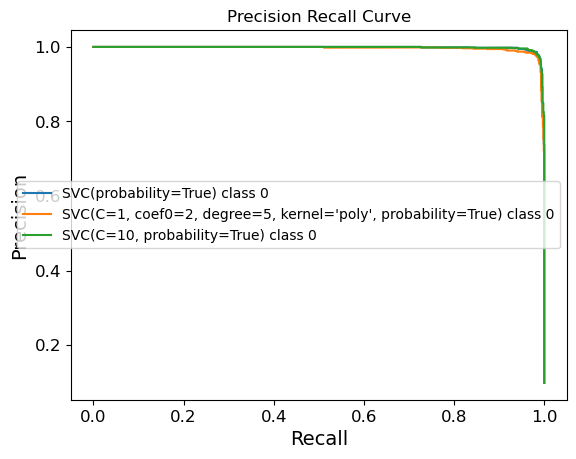

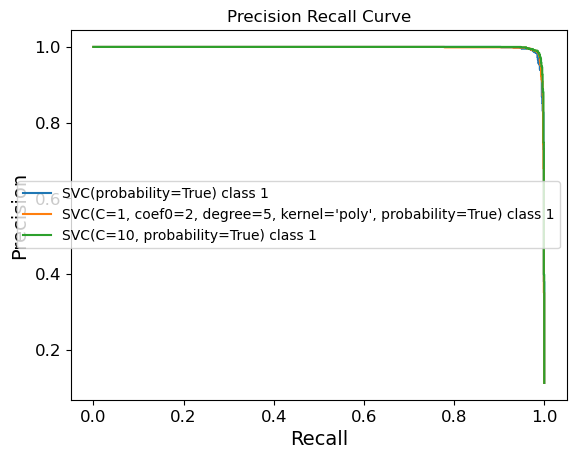

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [74]:
# Binarize the output labels
from sklearn.preprocessing import label_binarize
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

for i in range(10):  # Assuming 10 classes
    plt.figure()
    for model in [svm_clf_stock, svm_clf_poly_tuned, svm_clf_rbf_tuned]:
        precision, recall, thresholds = precision_recall_curve(y_test_binarized[:, i], model.predict_proba(X_test)[:, i])
        plt.plot(recall, precision, label=f'{model} class {i}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision Recall Curve for class {i}')
    plt.title('Precision Recall Curve')
    plt.legend()
    plt.show()

In [76]:
# try marcos params for poly kernel

svm_clf_poly_marco = SVC(kernel="poly", degree=7, C=45, coef0=2)
svm_clf_poly_marco.fit(X_train, y_train)
y_pred = svm_clf_poly_marco.predict(X_test)
accuracy_score(y_test, y_pred)

0.997